**Name : Prateek Bajpai**

**Class : Data Science & Big Data Analytics**

# **Model Selection with Cross Validation.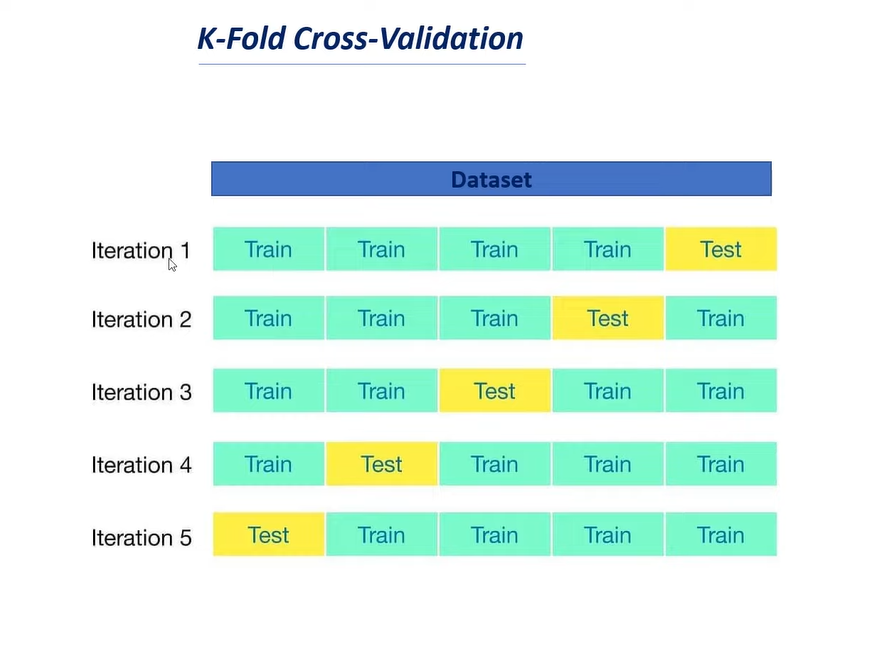**

## **Importing Libraries.**

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

## **Importing Models**

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## **Data Collection and Preprocessing.**

In [3]:
# loading the csv data

from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [4]:
# Reading the file

heart_data = pd.read_csv('heart.csv')

heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Dataset columns:

1. age: The person’s age in years.

2. sex: The person’s sex (1 = male, 0 = female)

3. cp: chest pain type

- Value 0: asymptomatic

- Value 1: atypical angina

- Value 2: non-anginal pain

- Value 3: typical angina

4. trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)

5. chol: The person’s cholesterol measurement in mg/dl

6. fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7. restecg: resting electrocardiographic results

-  Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria

-  Value 1: normal
-  Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

8. thalach: The person’s maximum heart rate achieved

9. exang: Exercise induced angina (1 = yes; 0 = no)

10. oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot.)

11. slope: the slope of the peak exercise ST segment —
- 0: downsloping
- 1: flat
- 2: upsloping

12. ca: The number of major vessels (0–3)

13. thal: A blood disorder called thalassemia
- Value 0: NULL
- Value 1: fixed defect (no blood flow in some part of the heart)
- Value 2: normal blood flow
- Value 3: reversible defect (a blood flow is observed but it is not normal)

14. target: Heart disease (1 = yes, 0= no)

In [5]:
heart_data.shape

(303, 14)

In [6]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Checking for missing values

heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# Checking distribution of target variable.

heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart


## **Splitting the features and target.**

In [9]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [10]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [11]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


## **Train Test Split.**

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state=3)

# Used stratify parameter so that we can have same proportion of training and testing data

In [13]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


## **Comparing the performance of Models from train_test_split.**

In [14]:
# list of models
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier()]

In [15]:
def compare_models_train_test():

  for model in models:

    # training the model
    model.fit(X_train, Y_train)

    # evaluating the model
    test_data_prediction = model.predict(X_test)

    accuracy = accuracy_score(Y_test, test_data_prediction)

    print('Accuracy score of the ', model, ' = ', accuracy)

In [16]:
compare_models_train_test()

Accuracy score of the  LogisticRegression(max_iter=1000)  =  0.7704918032786885
Accuracy score of the  SVC(kernel='linear')  =  0.7704918032786885
Accuracy score of the  KNeighborsClassifier()  =  0.6557377049180327
Accuracy score of the  RandomForestClassifier()  =  0.7868852459016393


## **Cross Validation.**


K-fold cross-validation is a technique used for assessing the performance of a
model and for mitigating the risk of overfitting.

It involves partitioning the dataset into k equal-sized subsets (or folds).


---



### *Logistic Regression.*

Binary classification algorithm used to predict the probability of a binary outcome.

In [17]:
cv_score_lr = cross_val_score(LogisticRegression(max_iter=1000), X, Y, cv=5)    # cv divides dataset into its different chunks or subset of data.

print(cv_score_lr)

mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)

mean_accuracy_lr = mean_accuracy_lr*100

mean_accuracy_lr = round(mean_accuracy_lr, 2)

print("Final Acccuracy Score % = ", mean_accuracy_lr)

[0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
Final Acccuracy Score % =  82.83


### *Support Vector Classifier.*

Used to classify data by finding the optimal decision boundary that maximally separates different classes.

In [18]:
cv_score_svc = cross_val_score(SVC(kernel='linear'), X, Y, cv=5)

print(cv_score_svc)

mean_accuracy_svc = sum(cv_score_svc)/len(cv_score_svc)

mean_accuracy_svc = mean_accuracy_svc*100

mean_accuracy_svc = round(mean_accuracy_svc, 2)

print("Final Acccuracy Score % = ", mean_accuracy_svc)

[0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
Final Acccuracy Score % =  82.83


### *KNN.*

The closer two given points are to each other, the more related and similar they are.

In [19]:
cv_score_svc = cross_val_score(KNeighborsClassifier(), X, Y, cv=5)

print(cv_score_svc)

mean_accuracy_svc = sum(cv_score_svc)/len(cv_score_svc)

mean_accuracy_svc = mean_accuracy_svc*100

mean_accuracy_svc = round(mean_accuracy_svc, 2)

print("Final Acccuracy Score % = ", mean_accuracy_svc)

[0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
Final Acccuracy Score % =  64.39


### *Random Forest Classifier.*

Combines the output of multiple decision trees to reach a single result.

In [20]:
cv_score_svc = cross_val_score(RandomForestClassifier(), X, Y, cv=5)

print(cv_score_svc)

mean_accuracy_svc = sum(cv_score_svc)/len(cv_score_svc)

mean_accuracy_svc = mean_accuracy_svc*100

mean_accuracy_svc = round(mean_accuracy_svc, 2)

print("Final Acccuracy Score % = ", mean_accuracy_svc)

[0.81967213 0.8852459  0.7704918  0.81666667 0.76666667]
Final Acccuracy Score % =  81.17


## **Compare the performance of the Models using CV score.**

In [21]:
def compare_models_cross_validation():

  for model in models:

    cv_score = cross_val_score(model, X,Y, cv=5)

    mean_accuracy = sum(cv_score)/len(cv_score)

    mean_accuracy = mean_accuracy*100

    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for ', model, '=  ', cv_score)
    print('Accuracy % of the ', model, mean_accuracy)
    print('----------------------------------------------')

In [22]:
compare_models_cross_validation()

Cross Validation accuracies for  LogisticRegression(max_iter=1000) =   [0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
Accuracy % of the  LogisticRegression(max_iter=1000) 82.83
----------------------------------------------
Cross Validation accuracies for  SVC(kernel='linear') =   [0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
Accuracy % of the  SVC(kernel='linear') 82.83
----------------------------------------------
Cross Validation accuracies for  KNeighborsClassifier() =   [0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
Accuracy % of the  KNeighborsClassifier() 64.39
----------------------------------------------
Cross Validation accuracies for  RandomForestClassifier() =   [0.80327869 0.86885246 0.81967213 0.81666667 0.76666667]
Accuracy % of the  RandomForestClassifier() 81.5
----------------------------------------------


## **Confusion Matrix**

A confusion matrix is a matrix that summarizes the performance of a machine learning model on a set of test data.

It is a means of displaying the number of accurate and inaccurate instances based on the model’s predictions.

- True positives (TP): Occur when the model accurately predicts a positive data point.

- True negatives (TN): Occur when the model accurately predicts a negative data point.

- False positives (FP): Occur when the model predicts a positive data point incorrectly.

- False negatives (FN): Occur when the model mispredicts a negative data point.

In [23]:
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix

# Prepare the data
X = heart_data.drop('target', axis=1)
y = heart_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train and evaluate models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}
confusion_matrices = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)

confusion_matrices

# [TP,  FN
#  FP,  TN]

{'Logistic Regression': array([[25,  4],
        [ 5, 27]]),
 'SVC': array([[26,  3],
        [ 5, 27]]),
 'KNN': array([[27,  2],
        [ 4, 28]]),
 'Random Forest': array([[24,  5],
        [ 5, 27]])}